In [1]:
import dl
import numpy as np
from tensorflow.keras.datasets import mnist
import cv2
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train.reshape((60000, 784)) / 255.0, x_test.reshape((10000, 784)) / 255.0
y_train_ohv, y_test_ohv = np.zeros((60000, 10)), np.zeros((10000, 10))

for i in range(60000):
    y_train_ohv[i][y_train[i]] = 1
for i in range(10000):
    y_test_ohv[i][y_test[i]] = 1

In [3]:
model = dl.Model([784, 24, 24, 10], ['relu', 'relu', 'relu'], [1e-4, 1e-3])
model.momentum(
    x_train,
    y_train_ohv,
    batch_size=10,
    loss_fn='mse',
    alpha=1e-2,
    beta=0.75,
    epochs=20
)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [08:40<00:00, 26.01s/it]


In [4]:
train_count, test_count = 0, 0
for i in range(60000):
    train_count += int(y_train[i] == np.argmax(model.forward(x_train[i])))
for i in range(10000):
    test_count += int(y_test[i] == np.argmax(model.forward(x_test[i])))
print(f'train acc - {(train_count / 60000) * 100}%\ntest acc - {(test_count / 10000) * 100}%')

train acc - 97.51833333333333%
test acc - 96.02000000000001%


In [5]:
def process(loc, lim):
    img = cv2.imread(loc)
    processed_img = cv2.resize(cv2.imread(loc, 0), dsize=(28, 28)) / 255.0
    for i in range(28):
        for j in range(28):
            processed_img[i][j] = int(processed_img[i][j] < lim)
    fig = plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('original')
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img)
    plt.title('processed')
    plt.show()
    return processed_img.reshape((784))


def test(loc, lim):
    print('prediction - ', np.argmax(model.forward(process(loc, lim))))

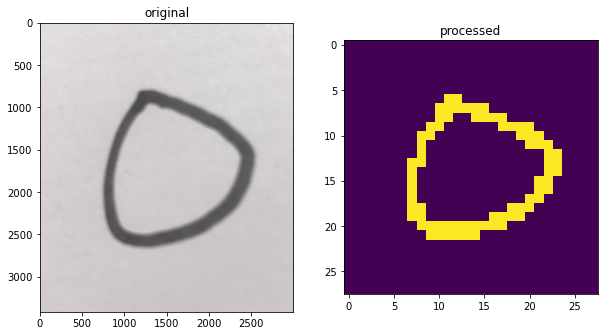

prediction -  0


In [6]:
test('C:/Users/rgbka/Desktop/zero.jpg', 0.7)

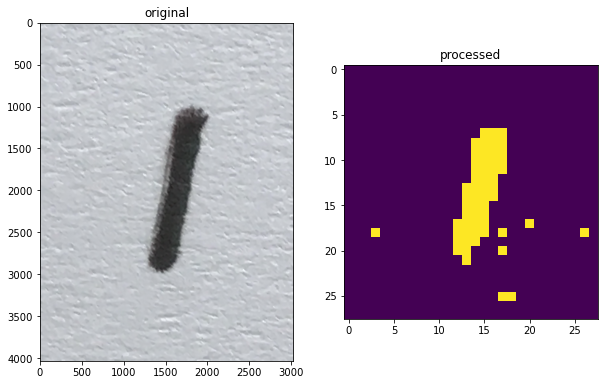

prediction -  1


In [7]:
test('C:/Users/rgbka/Desktop/one.jpg', 0.7)

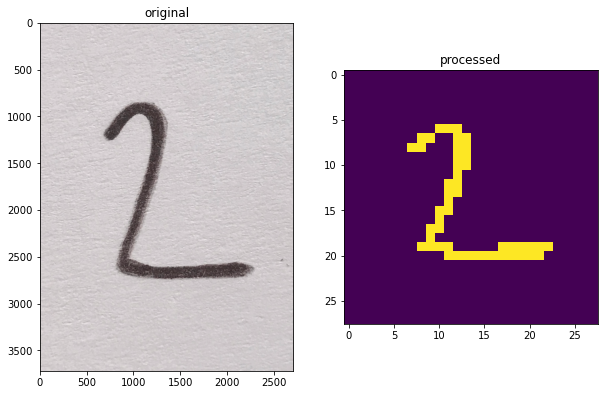

prediction -  0


In [8]:
test('C:/Users/rgbka/Desktop/two.jpg', 0.7)

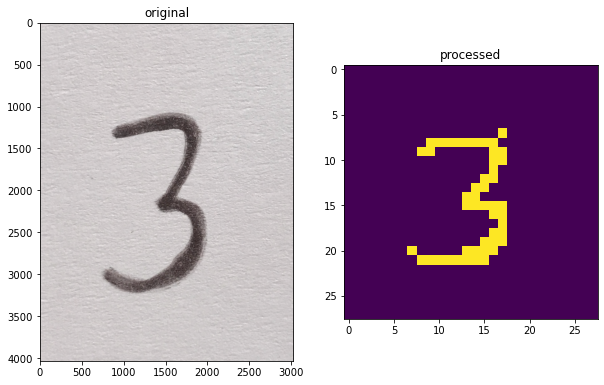

prediction -  3


In [9]:
test('C:/Users/rgbka/Desktop/three.jpg', 0.7)

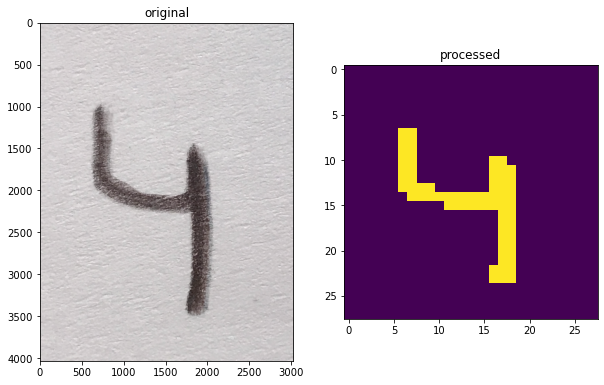

prediction -  4


In [10]:
test('C:/Users/rgbka/Desktop/four.jpg', 0.7)

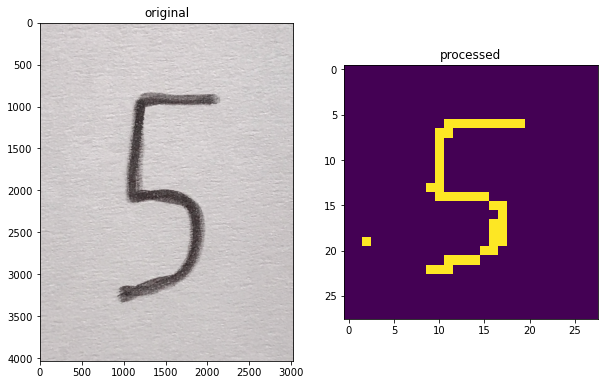

prediction -  5


In [11]:
test('C:/Users/rgbka/Desktop/five.jpg', 0.7)

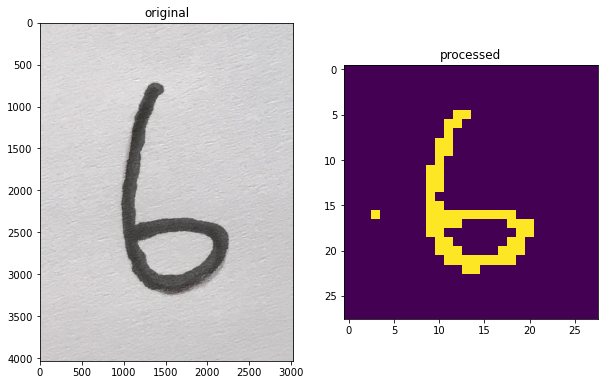

prediction -  6


In [12]:
test('C:/Users/rgbka/Desktop/six.jpg', 0.7)

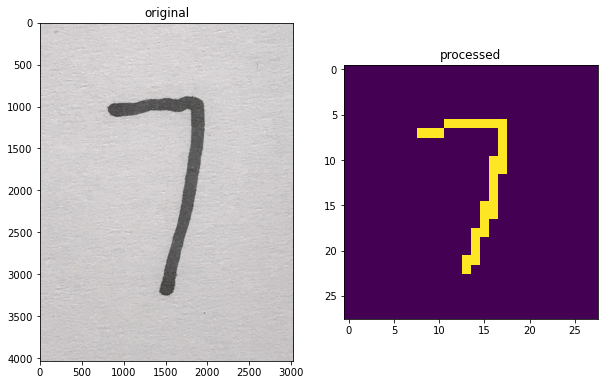

prediction -  7


In [13]:
test('C:/Users/rgbka/Desktop/seven.jpg', 0.7)

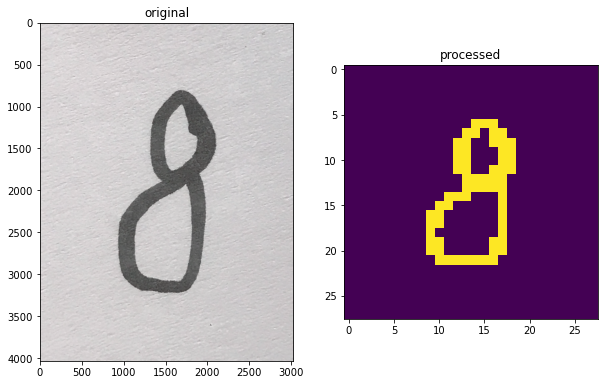

prediction -  9


In [14]:
test('C:/Users/rgbka/Desktop/eight.jpg', 0.6)

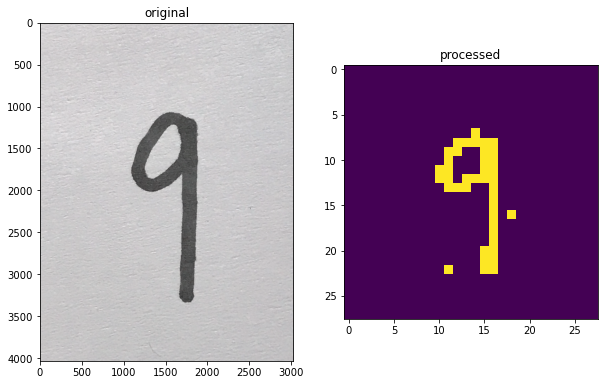

prediction -  9


In [15]:
test('C:/Users/rgbka/Desktop/nine.jpg', 0.7)